In [1]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load data
df = pd.read_csv('/content/drive/MyDrive/OMDENA_PROJECTS/2410_iPAGE_SoilData - 241029.csv')
df.head()

,Area,Data Collection Year,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,2005,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,2005,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,2005,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95
3,Mithpukur,2005,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.0
4,Mithpukur,2005,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04


In [4]:
df.shape

(618, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   Data Collection Year   618 non-null    int64  
 2   soil group             618 non-null    object 
 3   Land class             618 non-null    object 
 4   knit (surface)         461 non-null    object 
 5   pH                     618 non-null    object 
 6   SOC (%)                618 non-null    float64
 7   Nitrogen N (%)         618 non-null    object 
 8   Potassium K (meq/100)  618 non-null    object 
 9   Phosphorus P (ug/g)    618 non-null    object 
 10  Sulfur S (ug/g)        618 non-null    object 
 11  Boron B (ug/g)         618 non-null    object 
 12  Zinc Zn (ug/g)         618 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 62.9+ KB


Knit column has 157 null values.

In [6]:
df.columns

Index(['Area', 'Data Collection Year', 'soil group', 'Land class',
       'knit (surface)', 'pH', 'SOC (%)', 'Nitrogen N (%)',
       'Potassium K (meq/100)', 'Phosphorus P (ug/g)', 'Sulfur S (ug/g)',
       'Boron B (ug/g)', 'Zinc Zn (ug/g)'],
      dtype='object')

In [7]:
df.dtypes

,0
Area,object
Data Collection Year,int64
soil group,object
Land class,object
knit (surface),object
pH,object
SOC (%),float64
Nitrogen N (%),object
Potassium K (meq/100),object
Phosphorus P (ug/g),object


In [8]:
#Check for duplicates
df.duplicated().any()

False

In [9]:
#Drop year column
df.drop('Data Collection Year', axis=1, inplace=True)

In [10]:
# Check for garbage values
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())


Area
Mithpukur         213
Pirgacha          149
Kaunia upazila     99
Taraganj Thana     97
Gangachara         60
Name: count, dtype: int64
soil group
Gangachara                 238
Palashbari                  66
Kaunia                      63
Alluvial soil of Teesta     39
Pirgacha                    36
Berries                     32
belab                       20
the moon                    18
Sahapur                     16
Noadda                      15
Imadpur                     11
Teesta sandy soil           11
Berries                     10
Saghata                      8
recession                    8
Khilgaon                     5
Bhimpur                      5
Kachna                       3
The militants                3
Kachna                       3
Menanagar                    2
Imadpur                      1
the pen                      1
The militants                1
Chilmari                     1
Indrail                      1
chilmari                     1
Name: count

In [11]:
# Clean garbage from our data
columns_to_clean = [
    'pH', 'Nitrogen N (%)', 'Potassium K (meq/100)',
    'Phosphorus P (ug/g)', 'Sulfur S (ug/g)',
    'Boron B (ug/g)', 'Zinc Zn (ug/g)'
]

# Function to clean specified columns only
def clean_columns(df, columns):
    for col in columns:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()  # Remove leading/trailing spaces
            df[col] = df[col].str.replace(r'[^\d.]+', '', regex=True)  # Remove non-numeric chars except '.'
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, invalid entries become NaN
    return df

# Apply cleaning function to specified columns
df = clean_columns(df, columns_to_clean)
df.head()

,Area,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95
3,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00
4,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04


In [12]:
df.dtypes

,0
Area,object
soil group,object
Land class,object
knit (surface),object
pH,float64
SOC (%),float64
Nitrogen N (%),float64
Potassium K (meq/100),float64
Phosphorus P (ug/g),float64
Sulfur S (ug/g),float64


In [13]:
#Check for duplicates
df.duplicated().any()

False

In [14]:
#Get the percentage of null values
df.isnull().sum()/df.shape[0] * 100

,0
Area,0.000000
soil group,0.000000
Land class,0.000000
knit (surface),25.404531
pH,0.161812
SOC (%),0.000000
Nitrogen N (%),1.294498
Potassium K (meq/100),0.323625
Phosphorus P (ug/g),0.323625
Sulfur S (ug/g),0.161812


NOTE: Entries written 'Very Low' will be replaced with NaN after converting data types to float. Do we still impute with mean or mode or medium? Will dropping these columns impact how our model performs?

In [15]:
#impute boron with min value
df['Boron B (ug/g)'] = df['Boron B (ug/g)'].fillna(df['Boron B (ug/g)'].min())


In [16]:
#Impute columns with median
columns_to_impute = [
    'pH',
    'Nitrogen N (%)',
    'Potassium K (meq/100)',
    'Phosphorus P (ug/g)',
    'Sulfur S (ug/g)',
    'Zinc Zn (ug/g)'
]

for column in columns_to_impute:
    # Calculate the median for the column, ignoring NaN values
    median_value = df[column].median()
    # Fill NaN values with the median value
    df[column] = df[column].fillna(median_value)

#**EXPLORATORY DATA ANALYSIS**

In [17]:
#check for summary statistics
df.describe()

,pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,5.237589,1.792214,0.112997,0.458932,31.089450,15.338735,0.405987,1.039935
std,0.469621,1.034159,0.507104,3.380234,38.041979,11.062472,1.377350,0.975801
min,4.100000,0.100000,0.000200,0.000000,0.060000,0.400000,0.060000,0.080000
25%,4.900000,1.352500,0.070000,0.110000,8.800000,8.702500,0.230000,0.520000
50%,5.200000,1.700000,0.090000,0.170000,16.000000,12.600000,0.300000,0.820000
75%,5.400000,2.160000,0.110000,0.280000,37.400000,19.000000,0.400000,1.100000
max,7.800000,20.400000,12.600000,68.000000,254.700000,85.000000,34.000000,10.580000


In [18]:
df.describe(include = 'object')

,Area,soil group,Land class,knit (surface)
count,618,618,618,461
unique,5,27,5,5
top,Mithpukur,Gangachara,Medium high land,loam
freq,213,238,319,358


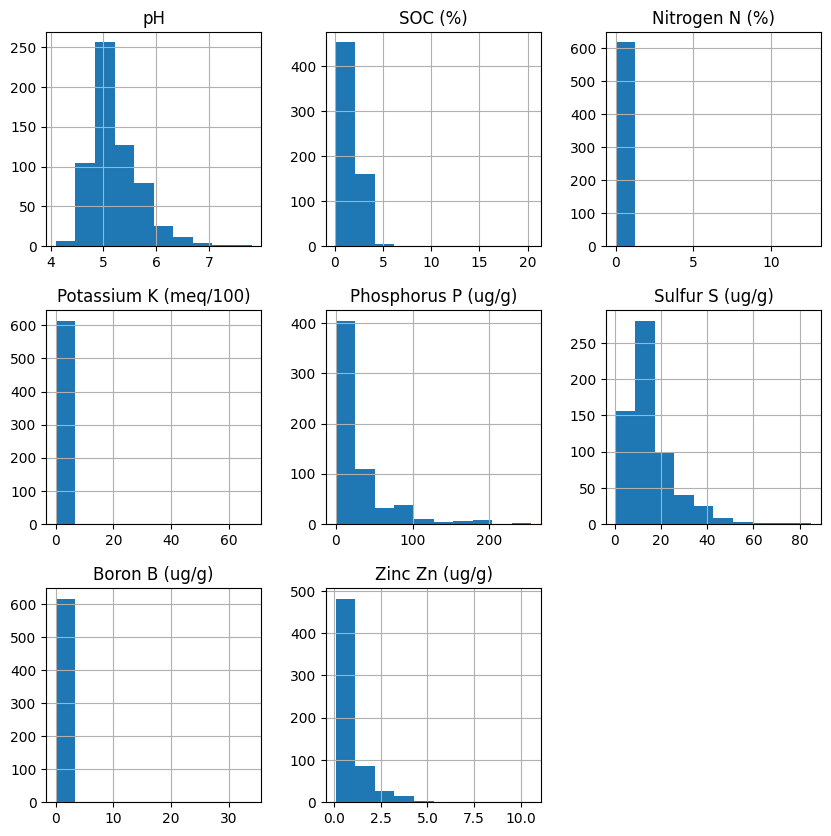

In [ ]:
#Plot distibution
df.hist(figsize=(10, 10))
plt.show()

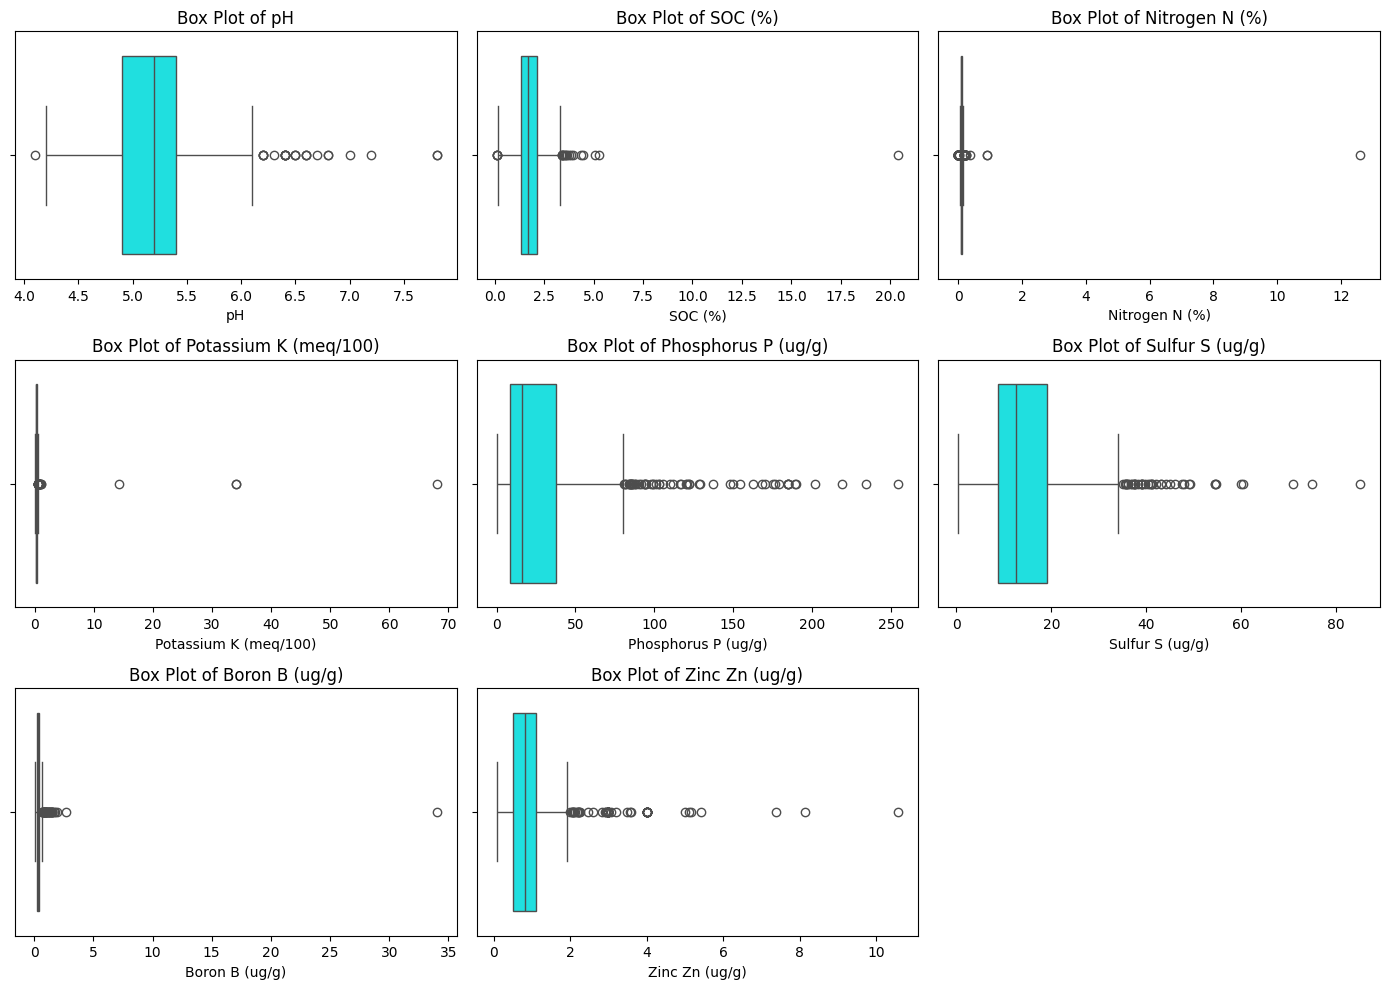

In [ ]:
#Plot box plots to identify outliers
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.boxplot(data=df, x=col, color='cyan')
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

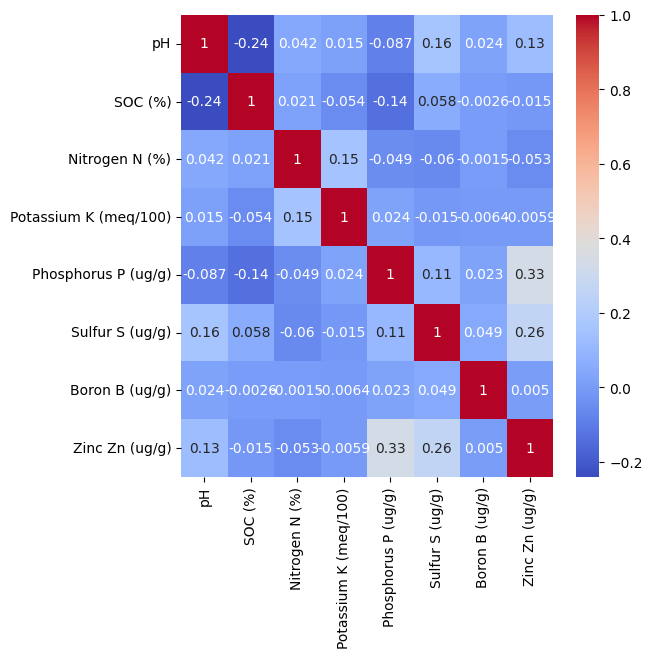

In [ ]:
#Check correlation
heat_map = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(6, 6))
sns.heatmap(heat_map, annot=True, cmap='coolwarm')
plt.show()

## Dealing with outliers

In [50]:
min_threshold = df.select_dtypes(include=['number']).quantile(0.03)
max_threshold = df.select_dtypes(include=['number']).quantile(0.97)


In [61]:
df2 = df.copy()

for col in max_threshold.index:  # Iterate over each numeric column
    df2 = df2[df2[col] <= max_threshold[col]]


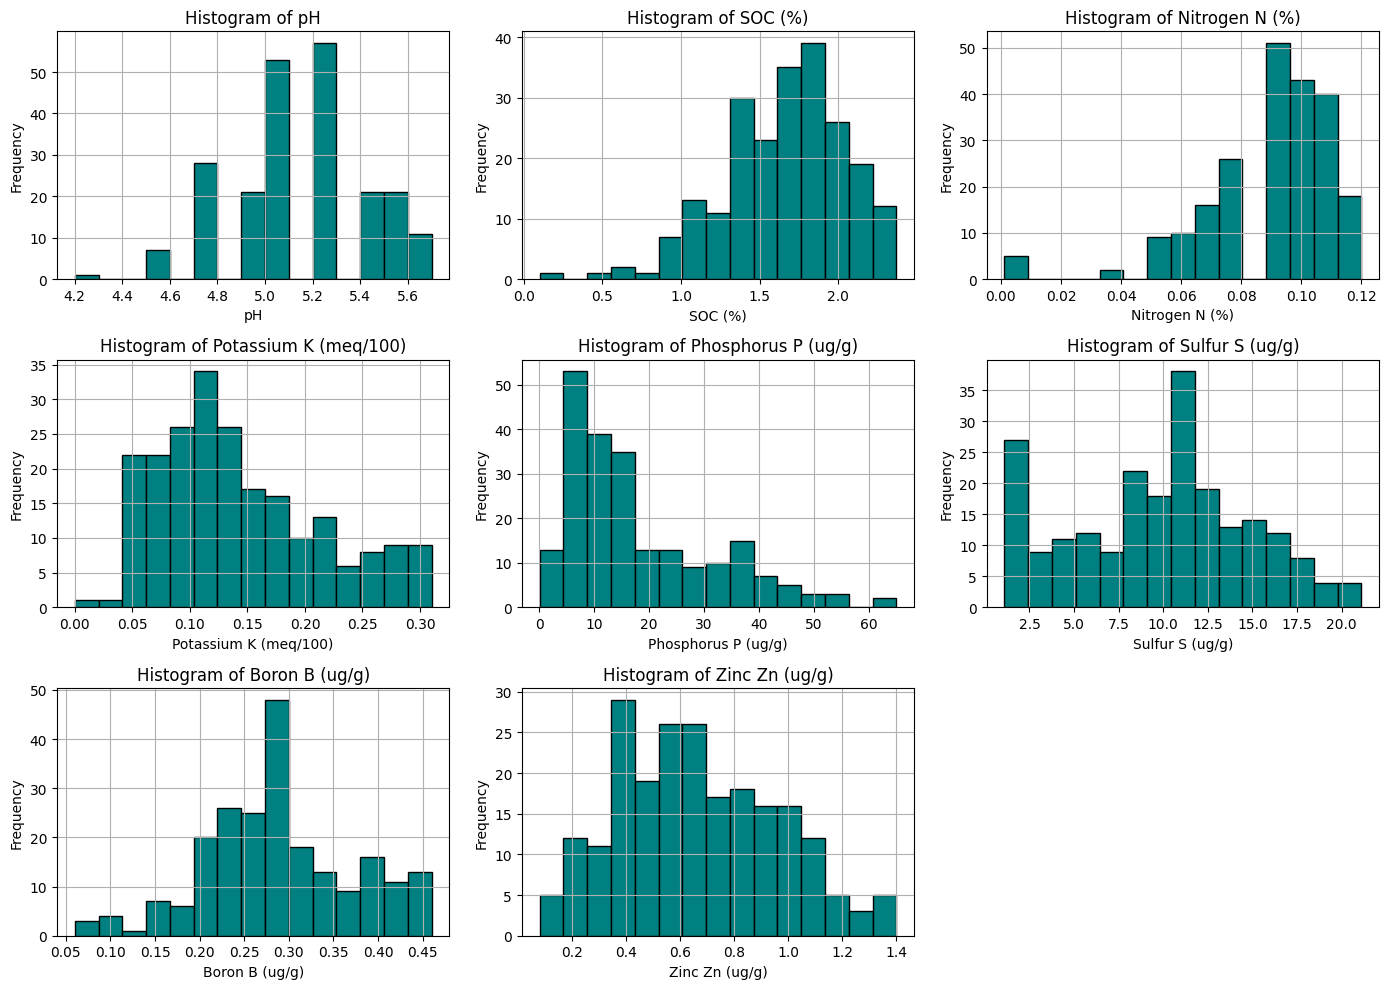

In [62]:
#plot the distribution of df2 numerical columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    df2[col].hist(bins=15, color='teal', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [63]:
df2.shape

(220, 12)

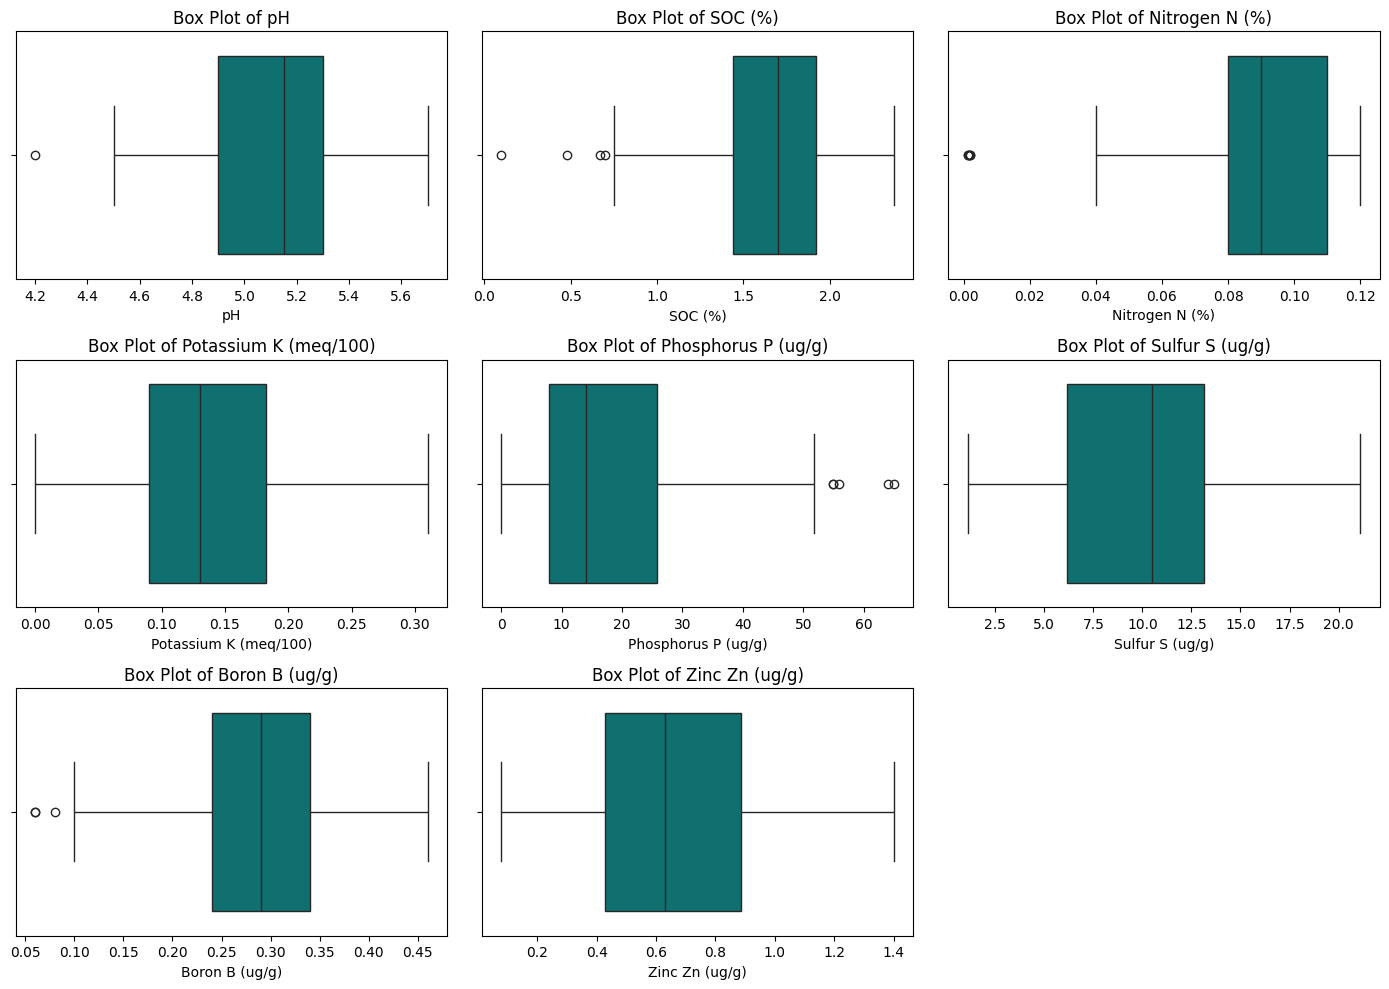

In [66]:
# Plot box plots for each numerical features
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.boxplot(data=df2, x=col, color='teal')
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

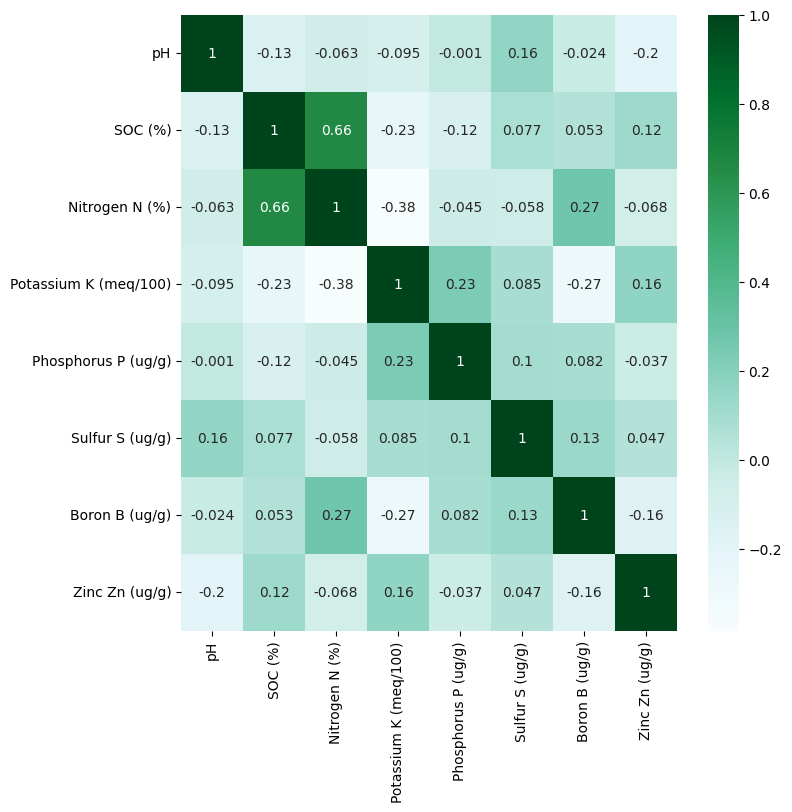

In [70]:
# Check the correlation between independent and dependent variables
heat_map = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(heat_map, annot=True, cmap='BuGn')
plt.show()